<a href="https://colab.research.google.com/github/sudeep-009/Transport-Demand-Prediction-Regression-Capstone-Project/blob/dev/Copy_of_Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [1]:
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
transport_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Traffic Demand Prediction-Capstone/train_revised.csv')

#**First lets understand the given dataset**

####**Lets explore few rows of our dataset**

In [5]:
pd.concat([transport_df.head(),transport_df.tail()])

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


**Lets see the number of records present in the given dataset**

In [6]:
print('Number of features present in the dataset:{}'.format(transport_df.shape[1]))
print('Number of records present in the dataset:{}'.format(transport_df.shape[0]))

Number of features present in the dataset:10
Number of records present in the dataset:51645


**Features Name present in the dataset**

In [7]:
for i in transport_df.columns:
  print(i)

ride_id
seat_number
payment_method
payment_receipt
travel_date
travel_time
travel_from
travel_to
car_type
max_capacity


**Null Value Detection**

In [30]:
transport_df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

**Finding:** There is no null value present in any of the features of the dataset.

In [31]:
#concise summary of the dataset
transport_df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


**Findings:**

1. Two type of payment method.
2. Only 149 days record is available.
3. There are 17 distinct origin.
4. There are 2 type of vehicle.

**Type, Null Count, Non Null Count, Unique Count of Features present in the dataset**

In [8]:
def info(dataset):
  info_df = pd.DataFrame(columns={'Type','Null Count','Non Null Count','Unique Count'},index=dataset.columns)
  info_df['Type'] = dataset.dtypes
  info_df['Null Count'] = dataset.isnull().sum()
  info_df['Non Null Count'] = len(dataset) - dataset.isnull().sum()
  info_df['Unique Count'] = dataset.nunique()
  return info_df

In [9]:
info(transport_df)

,Null Count,Type,Unique Count,Non Null Count
ride_id,0,int64,6249,51645
seat_number,0,object,61,51645
payment_method,0,object,2,51645
payment_receipt,0,object,51645,51645
travel_date,0,object,149,51645
travel_time,0,object,78,51645
travel_from,0,object,17,51645
travel_to,0,object,1,51645
car_type,0,object,2,51645
max_capacity,0,int64,2,51645


**Findings:**

1.    No Null Values are  present in the dataset.
2.    Maximum features are of categorical type.
3.    Two types of payment method.
4.    17 Unique Origin.
5.    1 Destination for all Origin
6.    2 Types of Vehicle.

#**EDA**

**Types of Payment**

In [10]:
transport_df['payment_method'].value_counts()

Mpesa    51532
Cash       113
Name: payment_method, dtype: int64

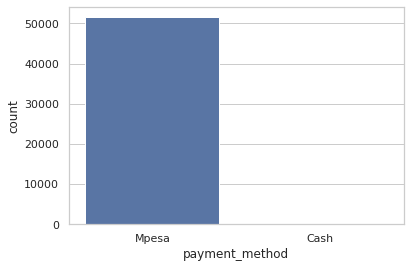

In [11]:
ax = sns.countplot(x="payment_method", data=transport_df)

**Findings:** Peoples are highly aware about digital payment. Less prefer to pay in cash.

**Unique Origin**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

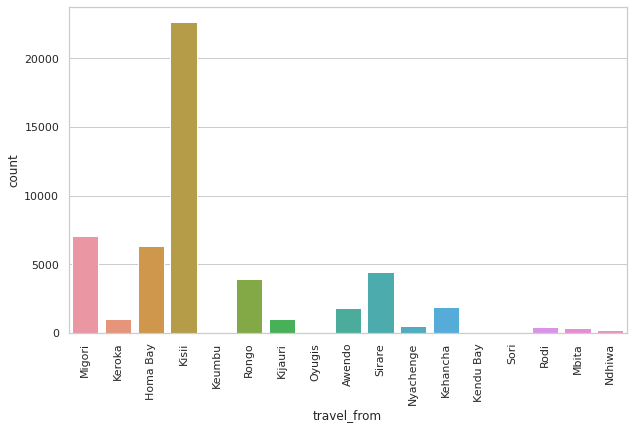

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x=transport_df['travel_from'])
plt.xticks(rotation=90)

**Findings:**
1. Some Origins have negligible impact on demand. Showing very less transit between them and Nairobi
2. Kisii is the most popular Origin. Having frequent availability of transportation vehicle.

**Car Type**

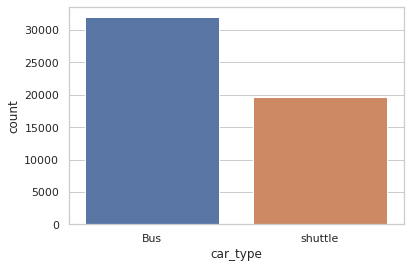

In [13]:
sns.countplot(x=transport_df['car_type'])

**Findings:**Bus is more in number than shuttle.

##**Problem Statement:**

Predicting demand of a particular ride means predicting a demand at a particular date and time for a  specific route

Now we can understand Demand here as a number of booking made for each ride. For this we will build a new dataset by grouping the rideId and all other features and then aggregating number of seat booked in a given ride. By doing this we will get out target variable in the form of number of booking for a given at a given time and data for a particular route.

**Dropping features**


As **payment_method**,**travel_to** and **max_capacity** will not play any role in determining the demand. Hence we will drop these features.

In [14]:
transform_df = transport_df.groupby(['ride_id','travel_from','travel_date','travel_time','car_type']).agg({"seat_number": "count"}).reset_index()

In [15]:
transform_df.rename(columns={'seat_number': 'num_booking'},inplace=True)

In [16]:
transform_df.head()

,ride_id,travel_from,travel_date,travel_time,car_type,num_booking
0,1442,Migori,17-10-17,7:15,Bus,1
1,5437,Migori,19-11-17,7:12,Bus,1
2,5710,Keroka,26-11-17,7:05,Bus,1
3,5777,Homa Bay,27-11-17,7:10,Bus,5
4,5778,Migori,27-11-17,7:12,Bus,31


**Shape of a transform dataframe**

In [17]:
transform_df.shape

(6249, 6)

In [18]:
#concise summary of dataframe
transform_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6249 entries, 0 to 6248
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ride_id      6249 non-null   int64 
 1   travel_from  6249 non-null   object
 2   travel_date  6249 non-null   object
 3   travel_time  6249 non-null   object
 4   car_type     6249 non-null   object
 5   num_booking  6249 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 293.0+ KB


**Transforming travel_date from object to pandas datetime object**

In [19]:
#object to pandas date time object
transform_df['travel_date'] = pd.to_datetime(transform_df['travel_date'])

In [20]:
#extracting day,month,year,dayofweek
transform_df['year'] = transform_df['travel_date'].dt.year
transform_df['month'] = transform_df['travel_date'].dt.month
transform_df['dayofweek'] = transform_df['travel_date'].dt.dayofweek
transform_df['day'] = transform_df['travel_date'].dt.day

In [21]:
transform_df.head()

,ride_id,travel_from,travel_date,travel_time,car_type,num_booking,year,month,dayofweek,day
0,1442,Migori,2017-10-17,7:15,Bus,1,2017,10,1,17
1,5437,Migori,2017-11-19,7:12,Bus,1,2017,11,6,19
2,5710,Keroka,2017-11-26,7:05,Bus,1,2017,11,6,26
3,5777,Homa Bay,2017-11-27,7:10,Bus,5,2017,11,0,27
4,5778,Migori,2017-11-27,7:12,Bus,31,2017,11,0,27


**Transforming travel time**

In [22]:
transform_df['travel_time'] = transform_df['travel_time'].apply(lambda x: x.split(':'))
transform_df['travel_time'] = transform_df['travel_time'].apply(lambda x: int(x[0])*60 + int(x[1]))

In [23]:
transform_df['boarding_time(hr)'] = transform_df['travel_time'].apply(lambda x: round(x/60,2))

In [24]:
transform_df.head()

,ride_id,travel_from,travel_date,travel_time,car_type,num_booking,year,month,dayofweek,day,boarding_time(hr)
0,1442,Migori,2017-10-17,435,Bus,1,2017,10,1,17,7.25
1,5437,Migori,2017-11-19,432,Bus,1,2017,11,6,19,7.20
2,5710,Keroka,2017-11-26,425,Bus,1,2017,11,6,26,7.08
3,5777,Homa Bay,2017-11-27,430,Bus,5,2017,11,0,27,7.17
4,5778,Migori,2017-11-27,432,Bus,31,2017,11,0,27,7.20


**Dropping Features**

Lets drop **travel_date**,**year** and **ride_id**

In [25]:
transform_df.drop(['travel_date','year'],axis=1,inplace=True)

In [26]:
transform_df.drop(['ride_id'],axis=1,inplace=True)

In [27]:
transform_df.head()

,travel_from,travel_time,car_type,num_booking,month,dayofweek,day,boarding_time(hr)
0,Migori,435,Bus,1,10,1,17,7.25
1,Migori,432,Bus,1,11,6,19,7.20
2,Keroka,425,Bus,1,11,6,26,7.08
3,Homa Bay,430,Bus,5,11,0,27,7.17
4,Migori,432,Bus,31,11,0,27,7.20


In [28]:
#label encoding for car_type
transform_df['car_type'] = transform_df['car_type'].apply(lambda x: 1 if(x=='Bus') else 0)

In [29]:
transform_df.head()

,travel_from,travel_time,car_type,num_booking,month,dayofweek,day,boarding_time(hr)
0,Migori,435,1,1,10,1,17,7.25
1,Migori,432,1,1,11,6,19,7.20
2,Keroka,425,1,1,11,6,26,7.08
3,Homa Bay,430,1,5,11,0,27,7.17
4,Migori,432,1,31,11,0,27,7.20


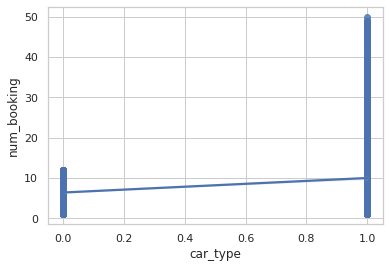

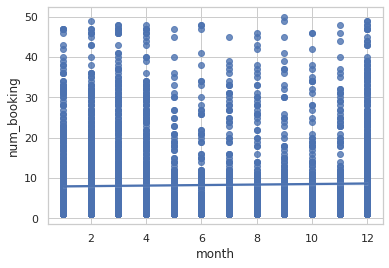

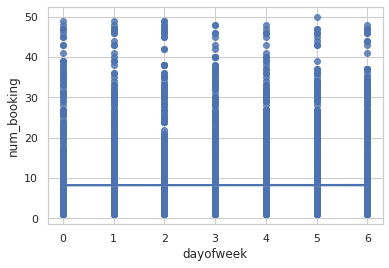

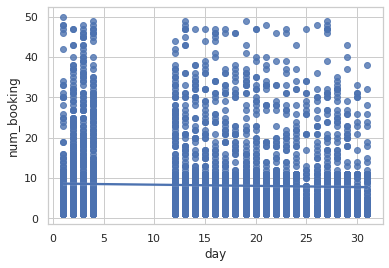

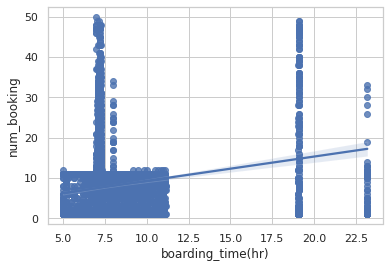

In [ ]:
feature_list=['car_type','month','dayofweek','day','boarding_time(hr)']
for i in feature_list:
  sns.regplot(x=transform_df[i],y=transform_df['num_booking'])
  plt.show()

So now we have 6249 records present in our dataset.

In [ ]:
transport_df['car_type'].nunique()

2

In [ ]:
transport_df['car_type'].value_counts()

Bus        31985
shuttle    19660
Name: car_type, dtype: int64

In [ ]:
transform_df = transport_df.groupby(['travel_from','travel_date','travel_time','ride_id']).agg({'seat_number': "count"}).sort_values(['travel_from','travel_date','travel_time']).reset_index()

In [ ]:
transform_df.head()

,travel_from,travel_date,travel_time,ride_id,seat_number
0,Awendo,01-04-18,7:08,12926,20
1,Awendo,01-04-18,7:12,12929,2
2,Awendo,01-04-18,7:13,12935,9
3,Awendo,01-04-18,8:00,12924,15
4,Awendo,02-03-18,7:08,11497,1


In [ ]:
transform_df.shape

(6249, 5)

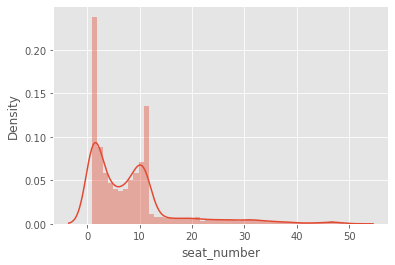

In [ ]:
sns.distplot(transform_df['seat_number'])

In [ ]:
transport_df[transport_df['ride_id']==5437]

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
transport_df.isna().value_counts()

ride_id  seat_number  payment_method  payment_receipt  travel_date  travel_time  travel_from  travel_to  car_type  max_capacity
False    False        False           False            False        False        False        False      False     False           51645
dtype: int64